In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
import re 
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df1 = pd.read_csv('Fake.csv')
df2 = pd.read_csv('True.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [5]:
df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


<AxesSubplot: xlabel='subject', ylabel='count'>

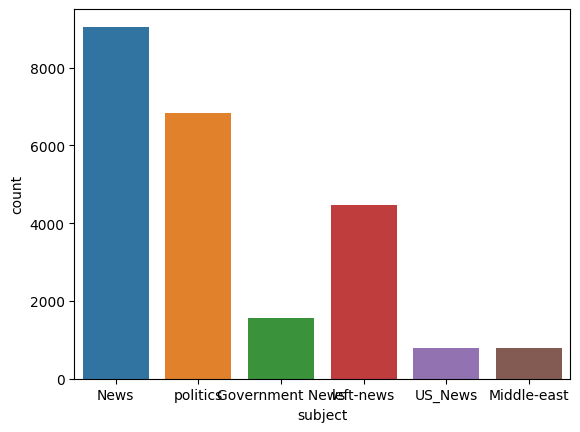

In [6]:
sns.countplot(x= 'subject',data=df1)

In [7]:
text = ' '.join(df1['text'].tolist())

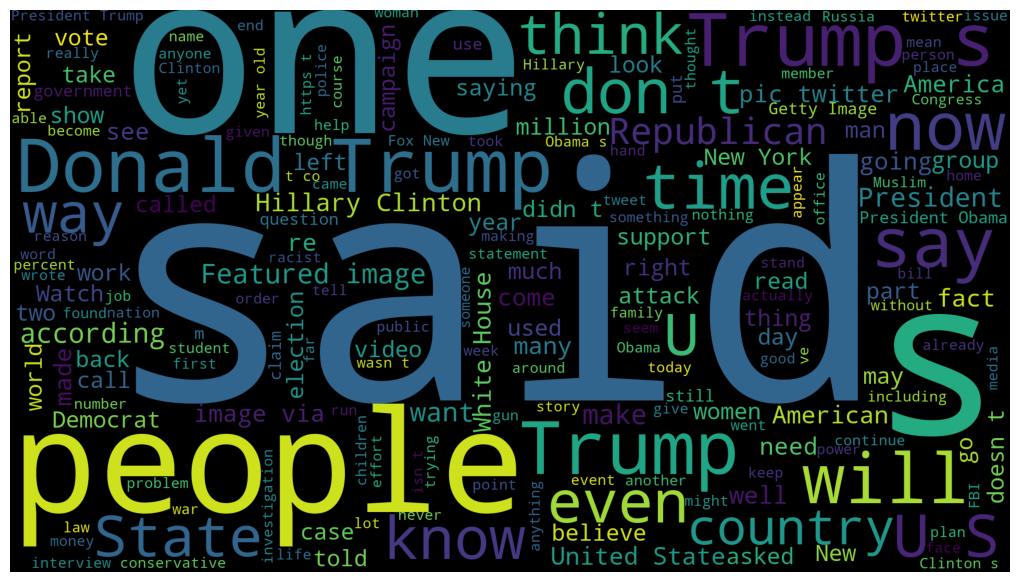

In [8]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
text = ' '.join(df2['text'].tolist())

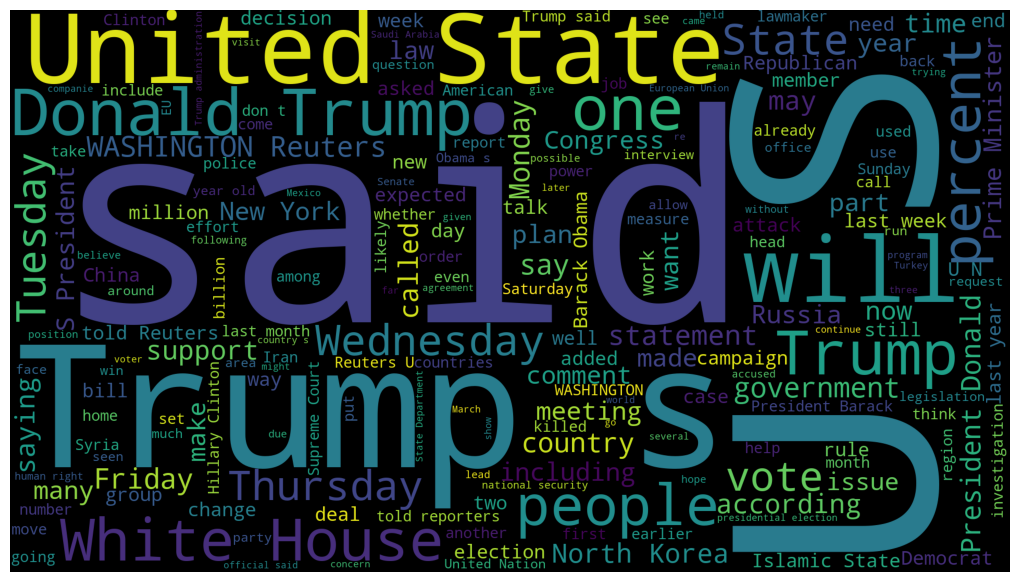

In [10]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
unknown_publishers = []
for index, row in enumerate(df2.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [12]:
len(unknown_publishers)

222

In [13]:
df2.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [14]:
df2 = df2.drop(8970, axis=0)

In [15]:
publisher = []
temp_text = []
for index, row in enumerate(df2.text.values):
    if index in unknown_publishers:
        temp_text.append(row)
        publisher.append('unkown')
    else:
        if ' - ' in row:
            record = row.split(' - ', maxsplit=1)
            publisher.append(record[0].strip())
            temp_text.append(record[1].strip())
        else:
            # handle cases where no " - " separator is found
            publisher.append('unknown')
            temp_text.append(row.strip())

In [16]:
df2['publisher']=publisher
df2['text'] = temp_text

In [17]:
df2.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [18]:
df2.shape

(21416, 5)

In [19]:
empty_df1_index = [index for index, text in enumerate(df1.text.tolist()) if str(text).strip()==""]

In [20]:
df1.iloc[empty_df1_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [21]:
df2['text'] = df2['title'] + " " + df2['text']
df1['text'] = df1['title'] + " " + df1['text']

In [22]:
df1['class']=1
df2['class']=0

In [23]:
df1.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [24]:
df2.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [25]:
df1 = df1[['text','class']]
df2 = df2[['text','class']]

In [26]:
data = df2.append(df1, ignore_index=True)

C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\ipykernel_24772\2659755385.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df2.append(df1, ignore_index=True)


In [27]:
data.sample(10)

,text,class
14170,China says hopes South Korea continues to appr...,0
34166,WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...,1
36714,INSANE: SECRET DEAL OBAMA MADE WITH “Death To ...,1
18447,Britain to limit acid sales after steep rise i...,0
7880,Billy Bush suspended from 'Today' show after t...,0
8024,Reuters/Ipsos States of the Nation: Clinton le...,0
10798,Ex-White House aide and ex-IBM CEO to head cyb...,0
16336,U.S sanctions North Koreans for 'flagrant' rig...,0
31168,WHY ANTI-TRUMP BILLIONAIRE MARK CUBAN Couldn’t...,1
22930,BREAKING: Acting FBI Director McCabe Contradi...,1


In [28]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Using cached spacy-2.2.3.tar.gz (5.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [49 lines of output]
  Traceback (most recent call last):
    File "C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-build-env-3kg8zgfy\overlay\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
    File "C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-build-env-3kg8zgfy\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-build-env-3kg8zgfy\overlay\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-build-env-3kg8zgfy\overlay\Lib\

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.4 MB/s eta 0:00:10
     --------------------------------------- 0.1/12.8 MB 991.0 kB/s eta 0:00:13
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.1 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.4/12.8 MB 1.0 MB/s eta 0:00:12
     - -------------------------------------- 0.5/12.8 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:12
     - -------------------------------------- 0.6/12.8 MB 

2023-04-02 00:52:56.398714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-04-02 00:52:56.398766: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-02 00:53:03.127955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2023-04-02 00:53:03.128390: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-02 00:53:03.136157: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Bhanu
2023-04-02 00:53:03.136248: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Bhanu


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\bhanu pratap singh\appdata\local\temp\pip-req-build-fo2cekl5
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7664 sha256=324aeb53f5af5cfc5ce2a0ca1a06aa6d6be00f1b987e5ae40802b2fdcaa596a4
  Stored in directory: C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-ephem-wheel-cache-9gtn0d3k\wheels\5c\94\34\99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\BHANU PRATAP SINGH\AppData\Local\Temp\pip-req-build-fo2cekl5'


In [29]:
import preprocess_kgptalkie as ps 

In [30]:
data['text'].apply(lambda x: ps.remove_special_chars(x))

0        As US budget fight looms Republicans flip thei...
1        US military to accept transgender recruits on ...
2        Senior US Republican senator Let Mr Mueller do...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge much more...
                               ...                        
44892    McPain John McCain Furious That Iran Treated U...
44893    JUSTICE Yahoo Settles Email Privacy Classactio...
44894    Sunnistan US and Allied Safe Zone Plan to Take...
44895    How to Blow 700 Million Al Jazeera America Fin...
44896    10 US Navy Sailors Held by Iranian Military Si...
Name: text, Length: 44897, dtype: object

In [31]:
import gensim 

In [32]:
y = data['class'].values

In [33]:
X = [d.split()for d in data['text'].tolist()]

In [34]:
DIM = 100 
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [35]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [36]:
X = tokenizer.texts_to_sequences(X)

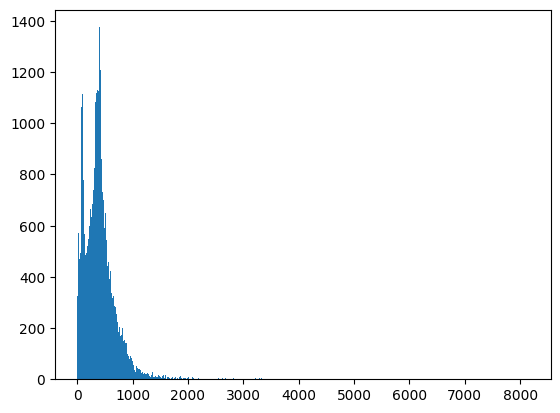

In [37]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [38]:
nos = np.array([len(x) for x in X])
len(nos[nos>6000])

12

In [39]:
maxlen = 6000
X = pad_sequences(X, maxlen=maxlen)

In [40]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [41]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [42]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
    return weight_matrix

In [43]:
embedding_vectors = get_weight_matrix(w2v_model)

In [44]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=True))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 6000, 100)         37535400  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 37,652,777
Trainable params: 37,652,777
Non-trainable params: 0
_________________________________________________________________


In [46]:
X_train, x_test, y_train, y_test = train_test_split(X,y)

In [47]:
model.fit(X_train, y_train, validation_split=0.3, epochs=2)

Epoch 1/2
737/737 [==============================] - 11783s 16s/step - loss: 0.1585 - acc: 0.9393 - val_loss: 0.1071 - val_acc: 0.9628
Epoch 2/2
737/737 [==============================] - 12696s 17s/step - loss: 0.0546 - acc: 0.9812 - val_loss: 0.0431 - val_acc: 0.9853


In [52]:
import numpy as np

In [53]:
with torch.no_grad():
    y_pred = model(x_test)
    y_pred = y_pred.numpy() >= 0.5

351/351 [==============================] - 1568s 4s/step


In [54]:
accuracy_score(y_test, y_pred)

0.9853006681514477

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5340
           1       0.99      0.98      0.99      5885

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

